In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import spline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### Parte 1 - Cálculo dos pesos e bias iniciais

Ao implementar um perceptron, o primeiro passo é iniciar os pesos em um intervalo pequeno, 
como [-0.5,0.5] utilizado nesse Notebook. 
O bias quando necessário também deve ser inicializado nessa etapa. Recomenda-se o uso
do bias em zero. Para a porta lógica AND, tornou-se necessário utilizar pequenos valores de bias
como -1, embora o melhor resultado seja obtido com bias igual a -5.

In [2]:
#initializa os pesos aleatoriamente e zera o bias 
def weight_init(num_inputs): 
    w = 0.5*np.random.random((num_inputs))  # [1x3] 
    b = -5
    return w,b

### Parte 2 - Implementação das funções de ativação

As funções de ativação definem o intervalo de valores que a saída do neurônio poderá ter.
Para redes neurais tradicionais, utiliza-se as funções degrau e sigmoid. Redes neurais profundas
como Redes Neurais de Convolução (CNN) e recorrentes (RNR, LSTM, GRU) utilizando as funções
Relu e Tangente Hiperbólica para evitar problemas no gradiente encontrados ao utilizar a função
degrau.

Esse Notebook contém implementações das quatro funções de ativação, para verificar a corretude
das mesmas, a função visualizeActivationFunc exibe os gráficos das mesmas, os intervalos desejados
para cada função de ativação são:
* Degrau: saída 0 se menor que 0 e saída 1 caso contrário
* Sigmoid: saída entre [0,1]
* Retificadora (Relu): saída 0 caso entrada seja negativa e maior que 1 caso contrário
* Tangente Hiperbólica: saída entre [-1,1]

In [3]:
### Funções de ativação ####
def activation_func(func_type, z):
    if func_type == 'sigmoid':
        return 1/(1+np.exp(-z))
    elif func_type == 'tanh':
        return (2/(1+np.exp(-2*z)) -1)
    elif func_type == 'relu':
        return z * (z > 0)
    elif func_type == 'degrau':
        return z>=0

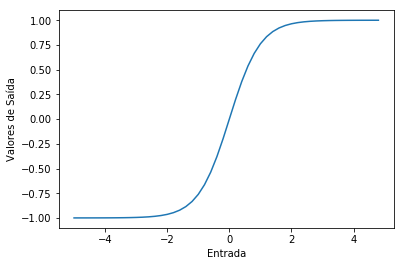

In [4]:
z = np.arange(-5., 5., 0.2)
def visualizeActivationFunc(z):
    z = np.arange(-5., 5., 0.2)
    func = []
    for i in range(len(z)):
        func.append(activation_func('tanh', z[i]))

    plt.plot(z,func)
    plt.xlabel('Entrada')
    plt.ylabel('Valores de Saída')
    plt.show()
visualizeActivationFunc(z)

### Parte 3 - Cálculo da saída do neurônio

Com os pesos, bias inicializados e a função de ativação implementada, calcula-se a saída
através da equação $$ Z = w * X + b $$
Feito isso, a saída final é calculada a partir da função de ativação escolhida

In [5]:
def propagate(w,b,X,Y):
    z = np.dot(w,X) + b
    out = activation_func('sigmoid', z)
    return out

### Parte 4 - Predição

De posse da saída, deve-se avaliar o sucesso da mesma definindo-se um limiar.
Para problemas binários, pode-se estabelecer o limiar em 0.5, de forma que abaixo disso 
a saída é 0 e 1 caso contrário.

In [6]:
# Faz a predição da saída
def predict(z):
    return (z>0.5).astype(int)

### Parte 5 - Treino e Avaliação

Durante o treinamento, a saída é calculada pela função propagate n vezes, onde n é a quantidade
de interações do algoritmo.
Na primeira interação, os pesos possuem valores pré-definidos pela função de inicialização e são aleatórios
após essa interação, as próximas calculam o peso baseado em um erro, calculado a partir da equação:
    
$$ erro = y - y_pred $$
    
Onde y é a saída original do conjunto de dados e y_pred as saidas calculadas. Dado o erro, 
os pesos são atualizados a partir da equação:
    
$$ w += erro * taxa de aprendizado*X $$
    
Onde X é o conjunto de entrada e a taxa de aprendizagem é um parâmetro de otimização que possui
seus valorse variando entre [0,1]. Recomenda-se o uso de taxas de aprendizagem medianas
para problemas com redes neurais tradicionais simples (como 0.2-0.5) e taxas de aprendizagem
maiores para redes neurais profundas (acima de 0.02).

In [7]:
def perceptron(x,y):
    w,b = weight_init(2)
    for j in range(5000):
        y_pred = propagate(w,b,x,y)
        erro = y - y_pred
        w += np.dot(erro*0.2, x.T)

    print('Saída obtida:', y_pred)
    print('Pesos obtidos:', w)

    #Métricas de Avaliação
    y_pred = predict(y_pred)
    print('Matriz de Confusão:')
    print(confusion_matrix(y, y_pred))
    print('F1 Score:')
    print(classification_report(y, y_pred))

In [8]:
## AND Gate
x = np.array([[0,0],[1,1],[1,0],[0,1]]).T 
y = np.array([0,1,0,0])

## OR Gate
#x = np.array([[0,0],[1,1],[1,0],[0,1]]).T 
#y = np.array([0,1,1,1])

perceptron(x,y)

Saída obtida: [ 0.00669285  0.8411309   0.1588691   0.1588691 ]
Pesos obtidos: [ 3.33333333  3.33333333]
Matriz de Confusão:
[[3 0]
 [0 1]]
F1 Score:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3
          1       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00         4

